# Auto Ml - Saúde de recém-nascidos
## Problema de Classificação com Auto ML

<center><img width="70%" src="https://img.freepik.com/free-vector/data-extraction-concept-illustration_114360-4766.jpg?w=1060&t=st=1670674513~exp=1670675113~hmac=cf5151ec7480787db7b8894ece73862f0da8d52cce671e70c4aef401e9e210cf"></center>


A bibilioteca PyCaret é uma biblioteca de auto Ml, low code. Com ela é possível realizar teste de modelos e aplicação de uma maneira rápida.  Essa ferramenta é útil para o Cientista de Dados realizar pequenos projetos, treinar suas habilidades na escolha dos modelos ou demonstrar didaticamente a aplicação de um. Porém, apesar de ser uma ferramenta automática ainda assim, como todos processos de automação, o ser humano precisa ter um papel nos bastidores. A avaliação das métricas e a aplicação do Auto ML ainda é necessário que o Cientista de Dados tome uma decisão, interprete os dados e apresente ao público. 
Este projeto então apresenta um problema de classificação com dados da Saúde de recém-nascidos para explicar as etapas usadas na aplicação de um modelo de Machine Learning. 
 
 
 Resumidamente para aplicação e escolha de um modelo de classificação, é necessário as etapas:

* Balanceamento dos dados se necessário
* Padronização ou normalização das variáveis 
* Aplicação dos modelos
* Avaliação das métricas dos modelos
* Otimização e escolha dos hiperparâmetros dos modelos
* Instanciamento do modelo escolhido
* Aplicação dos dados de teste 
 


## 1. Apresentando o problema

<center>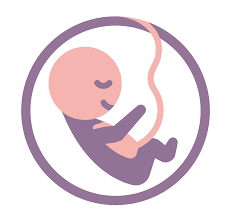</center>



Um dos indicadores do progresso humano é a redução da mortalidade infantil, este é um dos objetivos de Desenvolvimento Sustentável das Nações Unidas. Até 2030, para a ONU, é esperado que os países consigam acabar com as mortes evitáveis de recém nascidos e crianças com menos de 5 anos. Esta será uma redução prevista para de pelo menos 25 mortes por 1000 nascimentos. 

Em paralelo a mortalidade infantil a mortalidade materna representa 295000 mortes durante o período de gravidez ou durante os partos (dados de 2017). Aproximadamente 94% dessas mortes ocorreram em locais de poucos recursos em que a maioria poderia ter sido evitada. 

A Cardiotocografia (CTG) é uma opção simples e de baixo custo para avaliação da saúde fetal. Isto permite que profissionais da saúde possam atuar na prevenção da mortalidade infantil e materna. O equipamento de CTG funciona enviando pulsos de ultrassom e a partir da resposta acompanhar a frequência cardíaca fetal (FCF), movimentos, contrações uterinas e outros comportamentos. 
Os dados apresentados aqui são de um conjunto de dados de CTG disponíveis no kaggle. O problema abordado será a classificação da saúde fetal a partir dos dados de CTG. 

Os modelos de classificação são modelos supervisionados de machine learning que buscam prever uma categoria para determinada observação. Essa categoria é selecionada a partir de características determinadas. Isto é, os modelos estimam uma classificação para dados não vistos anteriormente. Essa classificação pode ser binária (0 ou 1) ou multiclasses. 

## 2. Importando os dados

In [2]:
# warning ignores
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

# pacotes necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# biblioteca pycaret
!pip install pycaret -q

# configurando o pycaret pata o colab
from pycaret.utils import enable_colab
enable_colab()

     |████████████████████████████████| 320 kB 6.0 MB/s 
     |████████████████████████████████| 167 kB 15.5 MB/s 
     |████████████████████████████████| 6.8 MB 14.5 MB/s 
     |████████████████████████████████| 328 kB 48.5 MB/s 
     |████████████████████████████████| 3.3 MB 75.6 MB/s 
     |████████████████████████████████| 1.3 MB 58.0 MB/s 
     |████████████████████████████████| 25.8 MB 1.8 MB/s 
     |████████████████████████████████| 5.0 MB 71.5 MB/s 
     |████████████████████████████████| 1.7 MB 59.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 56 kB 4.9 MB/s 
     |████████████████████████████████| 2.0 MB 43.6 MB/s 
     |████████████████████████████████| 16.7 MB 51.5 MB/s 
     |████████████████████████████████| 88 kB 8.0 MB/s 
     |████████████████████████████████| 662 kB 53.2 MB/s 
     |█████████████████

In [3]:
# importando os dados
DATA_PATH = "https://raw.githubusercontent.com/ptavares96/Projeto---Utilizando-AutoML-para-problemas-de-classifica-o/main/fetal_health.csv"
df = pd.read_csv(DATA_PATH)

Verifica-se então as primeiras entradas para conferir que os dados foram importados. E também verifica-se as últimas entradas para observar se não há alguma entrada que corresponda a algum total. 

In [4]:
# verificando as primeiras entradas
df.head()

# verificando as últimas entradas
df.tail()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
2121,140.0,0.000,0.000,0.007,0.0,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.0,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.0,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.0,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0
2125,142.0,0.002,0.002,0.008,0.0,0.0,0.0,74.0,0.4,36.0,...,117.0,159.0,2.0,1.0,145.0,143.0,145.0,1.0,0.0,1.0


## 3. Informação dos dados

In [5]:
def info_dados(df):    
    print('Número de entradas (linhas): ', df.shape[0])
    print('\nNúmero de variáveis (colunas): ', df.shape[1])
    print("\nDados ausentes (total):\t{}\n".format(df.isnull().sum().max()))
    print("\nNomes das features:\n{}\n".format(df.columns.values))
    print("Valores únicos (por coluna):\n{}\n".format(df.nunique()))
    print("Tipos de Variáveis (por coluna)\n{}".format(df.dtypes))
    for column in df.columns[1:]:
        print(f'\nColuna {column}: {df[column].unique()}')

In [ ]:
info_dados(df)

Número de entradas (linhas):  2126

Número de variáveis (colunas):  22

Dados ausentes (total):	0


Nomes das features:
['baseline value' 'accelerations' 'fetal_movement' 'uterine_contractions'
 'light_decelerations' 'severe_decelerations' 'prolongued_decelerations'
 'abnormal_short_term_variability' 'mean_value_of_short_term_variability'
 'percentage_of_time_with_abnormal_long_term_variability'
 'mean_value_of_long_term_variability' 'histogram_width' 'histogram_min'
 'histogram_max' 'histogram_number_of_peaks' 'histogram_number_of_zeroes'
 'histogram_mode' 'histogram_mean' 'histogram_median' 'histogram_variance'
 'histogram_tendency' 'fetal_health']

Valores únicos (por coluna):
baseline value                                             48
accelerations                                              20
fetal_movement                                            102
uterine_contractions                                       16
light_decelerations                                        16
s

**Dicionário de variável:**

* baseline value: baseline da frequência cardíaca fetal (FHR) (batimentos por minuto)
* accelerations: número de acelerações por segundo
* fetal_movement: número de movimentos fetais por segundo
* uterine_contractions: número de contrações uterinas por segundo
* light_decelerations: número de desacelerações leves (LDs) por segundo
* severe_decelerations: número de desacelerações severas (SDs) por segundo
* prolongued_decelerations: número de desaceleraçãoes prolongadas (PDs) por segundo
* abnormal_short_term_variability: porcentagem de tempo com variabilidade anormal de curto prazo
* mean_value_of_short_term_variability: valor médio da variabilidade de curto prazo
* percentage_of_time_with_abnormal_long_term_variability: porcentagem de tempo com variabilidade de longo prazo
* mean_value_of_long_term_variability: valor médio da variabilidade de longo prazo
* histogram_width: largura do histograma criado com os todos os dados de um registro
* histogram_min: valor mínimo do histograma
* histogram_max: valor máximo do histograma
* histogram_number_of_peaks: número de picos no histograma do exame
* histogram_number_of_zeroes: número de zeros no histograma do exame
* histogram_mode: modo de histograma
* histogram_mean: média do histograma
* histogram_median: mediana do histograma
* histogram_variance: variância do histograma
* histogram_tendency: tendência do histograma
* **fetal_health: códificação em 1-Normal; 2-Suspeito; 3-Patológico. Está é a variável alvo.** 

## 4 Separação dos dados

A separação dos dados em treino e teste é importante para evitar que ocorra algum overfitting. 


In [59]:
# separando os dados entre treino e teste
train = df.sample(frac=0.85)
test = df.drop(train.index)

test.reset_index(inplace = True, drop = True)
train.reset_index(inplace = True, drop = True)

# verificando o formato dos conjuntos
print(f"Formato dos dados de treino: {train.shape}")
print(f"Formato dos dados de teste: {test.shape}")

Formato dos dados de treino: (1807, 22)
Formato dos dados de teste: (319, 22)


## 5. Configurando o Pycaret

In [60]:
# importando os pacotes necessários
from pycaret.classification import setup, compare_models, models, create_model, predict_model
from pycaret.classification import tune_model, plot_model, evaluate_model, finalize_model
from pycaret.classification import save_model, load_model

Para escolha do modelo é nessário realizr um setup do pycaret. Neste setup ocorrerá o processamento necessário dos dados. Nesse caso será escolhido normalizaçao e o balanceamento dos dados. 

In [61]:
# setup e pipeline para o pycaret
clf = setup(data=train, 
            target='fetal_health', 
            normalize = True,
            fix_imbalance = True)

,Description,Value
0,session_id,6786
1,Target,fetal_health
2,Target Type,Multiclass
3,Label Encoded,None
4,Original Data,"(1807, 22)"
5,Missing Values,False
6,Numeric Features,20
7,Categorical Features,1
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[],
                                      target='fetal_health',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric...
                ('P_transform', 'passthrough'), ('binn', 'passthrough'),
                ('rem_outliers', 'passthrough'), ('cluster_all'

Aqui é apresentado os modelos utilizados no Pycaret


In [62]:
models()

INFO:logs:gpu_param set to False


,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


É visto a baixo os modelos aplicados pelos dados e as métricas. As métricas são calculadas a partir de CrossValidation. 

In [64]:
best = compare_models()


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9494,0.9863,0.8998,0.9508,0.9491,0.8528,0.8541,0.653
rf,Random Forest Classifier,0.9415,0.9853,0.8887,0.9428,0.9413,0.8308,0.8319,0.654
gbc,Gradient Boosting Classifier,0.9415,0.9830,0.8999,0.9441,0.9419,0.8341,0.8354,2.794
et,Extra Trees Classifier,0.9343,0.9820,0.8599,0.9359,0.9341,0.8091,0.8105,0.293
dt,Decision Tree Classifier,0.9177,0.9005,0.8669,0.9233,0.9192,0.7707,0.7735,0.052
lr,Logistic Regression,0.8877,0.9712,0.8579,0.9132,0.8955,0.7131,0.7239,0.217
knn,K Neighbors Classifier,0.8853,0.9443,0.8489,0.9105,0.8934,0.7047,0.7142,0.055
svm,SVM - Linear Kernel,0.8766,0.0000,0.8456,0.9069,0.8859,0.6871,0.6999,0.088
ada,Ada Boost Classifier,0.8742,0.8415,0.6996,0.8748,0.8676,0.6043,0.6125,0.559
ridge,Ridge Classifier,0.8394,0.0000,0.8332,0.8997,0.8561,0.6270,0.6557,0.038


INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 4
INFO:logs:LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=6786, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:compare_models() succesfully completed......................................


Para esse problema o modelo que se destava é Light Gradient Boosting. 

## 6. Instanciando e tuning do modelo

Nesta etapa será criado o modelo e a otimização dos hiperparâmetros. Para a otimização será usada a métrica de acurácia. 

In [63]:
lgbm = create_model('lightgbm')

tuned_lgbm = tune_model(lgbm, optimize = 'Accuracy')


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9528,0.9956,0.9326,0.9575,0.9541,0.8692,0.8714
1,0.9606,0.9880,0.9009,0.9597,0.9601,0.8843,0.8845
2,0.9134,0.9623,0.7984,0.9128,0.9093,0.7286,0.7350
3,0.9449,0.9841,0.8642,0.9455,0.9442,0.8351,0.8362
4,0.9365,0.9762,0.8897,0.9383,0.9373,0.8205,0.8207
5,0.9603,0.9883,0.9186,0.9618,0.9608,0.8860,0.8862
6,0.9524,0.9920,0.8964,0.9526,0.9523,0.8611,0.8613
7,0.9444,0.9832,0.9038,0.9452,0.9447,0.8429,0.8432
8,0.9524,0.9800,0.8800,0.9506,0.9510,0.8587,0.8598


INFO:logs:create_model_container: 2
INFO:logs:master_model_container: 2
INFO:logs:display_container: 3
INFO:logs:LGBMClassifier(bagging_fraction=0.5, bagging_freq=4, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.4,
               importance_type='split', learning_rate=0.3, max_depth=-1,
               min_child_samples=11, min_child_weight=0.001, min_split_gain=0,
               n_estimators=110, n_jobs=-1, num_leaves=256, objective=None,
               random_state=6786, reg_alpha=0.001, reg_lambda=4, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:tune_model() succesfully completed......................................


In [65]:
print('Hiperparâmetros usados no modelo:\n')
print(lgbm)
print('\nHiperparâmetros usados no modelo otimizado:\n')
print(tuned_lgbm)

Hiperparâmetros usados no modelo:

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=6786, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

Hiperparâmetros usados no modelo otimizado:

LGBMClassifier(bagging_fraction=0.5, bagging_freq=4, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.4,
               importance_type='split', learning_rate=0.3, max_depth=-1,
               min_child_samples=11, min_child_weight=0.001, min_split_gain=0,
               n_estimators=110, n_jobs=-1, num_leaves=256, objective=None,
               random_state=6786, reg_alpha=0.001, reg_lambda=4, silent='warn

## 7. Plots do modelo 

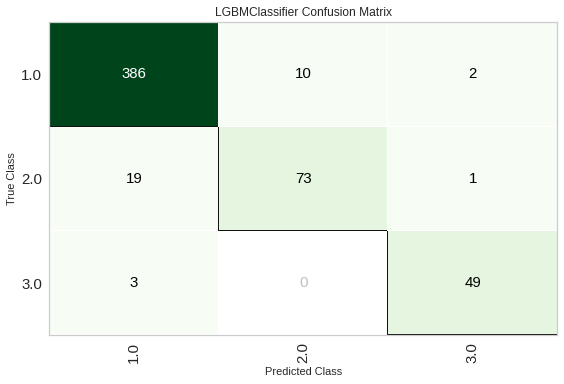

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [66]:
# matriz 
plot_model(tuned_lgbm, plot='confusion_matrix')

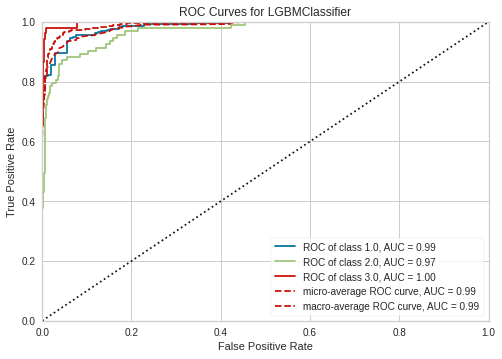

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [67]:
plot_model(tuned_lgbm, plot='auc')

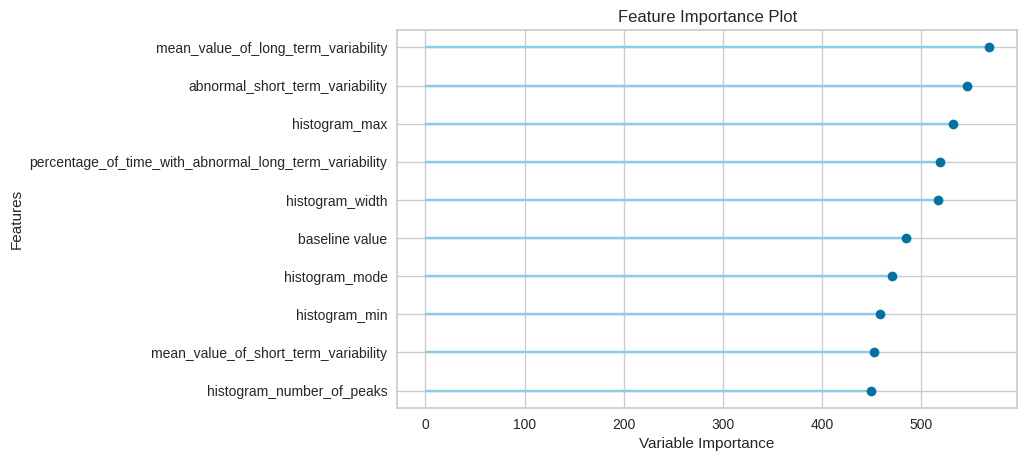

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [68]:
plot_model(tuned_lgbm, plot='feature')

## 8. Fazendo previsões

Esta predição é realizada a partir de dados de validação em que o próprio pycaret realizou a separação. 

In [71]:
pred_val = predict_model(tuned_lgbm, raw_score=True)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=LGBMClassifier(bagging_fraction=0.5, bagging_freq=4, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.4,
               importance_type='split', learning_rate=0.3, max_depth=-1,
               min_child_samples=11, min_child_weight=0.001, min_split_gain=0,
               n_estimators=110, n_jobs=-1, num_leaves=256, objective=None,
               random_state=6786, reg_alpha=0.001, reg_lambda=4, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=True, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9355,0.9842,0.899,0.9343,0.9344,0.8443,0.8452


## 9. Finalizando o modelo

In [70]:
# finalizando o modelo
final_lgbm = finalize_model(tuned_lgbm)

INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(estimator=LGBMClassifier(bagging_fraction=0.5, bagging_freq=4, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.4,
               importance_type='split', learning_rate=0.3, max_depth=-1,
               min_child_samples=11, min_child_weight=0.001, min_split_gain=0,
               n_estimators=110, n_jobs=-1, num_leaves=256, objective=None,
               random_state=6786, reg_alpha=0.001, reg_lambda=4, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0), fit_kwargs=None, groups=None, model_only=True, display=None, experiment_custom_tags=None, return_train_score=False)
INFO:logs:Finalizing LGBMClassifier(bagging_fraction=0.5, bagging_freq=4, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.4,
               importance_type='split', learning_rate=0.3, max_depth=-1,
               min_child_s

In [72]:
# salvando o modelo
save_model(final_lgbm, 'Modelo_final_23_12')

INFO:logs:Initializing save_model()
INFO:logs:save_model(model=LGBMClassifier(bagging_fraction=0.5, bagging_freq=4, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.4,
               importance_type='split', learning_rate=0.3, max_depth=-1,
               min_child_samples=11, min_child_weight=0.001, min_split_gain=0,
               n_estimators=110, n_jobs=-1, num_leaves=256, objective=None,
               random_state=6786, reg_alpha=0.001, reg_lambda=4, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0), model_name=Modelo_final_23_12, prep_pipe_=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_f

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[],
                                       target='fetal_health',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric...
                                 boosting_type='gbdt', class_weight=None,
                                 colsample_bytree=1.0, feature_fraction=0.4,
                                 importance_type='split', learning_rate=0.3,
       

## 10. Fazendo previsões em dados não visto antes

In [73]:
# carregando o modelo
saved_model = load_model('Modelo_final_23_12')

INFO:logs:Initializing load_model()
INFO:logs:load_model(model_name=Modelo_final_23_12, platform=None, authentication=None, verbose=True)


Transformation Pipeline and Model Successfully Loaded


In [75]:
# fazendo previsões com conjunto de teste
unseen_predictions = predict_model(saved_model, data = test, raw_score=True)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[],
                                      target='fetal_health',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric...
                                boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, feature_fraction=0.4,
                           

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9436,0.9823,0.8863,0.9429,0.943,0.8329,0.8334


In [80]:
unseen_predictions.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health,Label,Score_0,Score_1,Score_2
0,151.0,0.000,0.000,0.001,0.001,0.0,0.000,64.0,1.9,9.0,...,150.0,148.0,151.0,9.0,1.0,2.0,2,0.0019,0.9974,0.0006
1,130.0,0.006,0.441,0.005,0.005,0.0,0.000,24.0,2.1,0.0,...,143.0,128.0,138.0,70.0,1.0,1.0,1,0.9999,0.0000,0.0000
2,129.0,0.000,0.340,0.004,0.002,0.0,0.003,30.0,2.1,0.0,...,129.0,104.0,120.0,138.0,0.0,3.0,3,0.0001,0.0005,0.9995
3,120.0,0.006,0.109,0.007,0.000,0.0,0.000,27.0,3.7,0.0,...,125.0,124.0,126.0,24.0,0.0,1.0,1,0.9999,0.0001,0.0000
4,115.0,0.005,0.079,0.005,0.003,0.0,0.000,23.0,3.4,0.0,...,119.0,116.0,118.0,21.0,0.0,1.0,1,0.9998,0.0000,0.0002


# Conclusão

O objetivo desse projeto era destacar o uso de AutoML em problemas de classificação. Essa ferramenta se mostra útil para o cientista de dados que precisa realizar um rápida avaliação e aplicação de um modelo. 

Por exemplo, a etapa de processamento dos dados. Com o PyCaret é possível realizar rapidamente uma avaliação qual o processamento é interessante realizar, como PCA, normalização, balanceamento. Alguma dessas etapas é possível ser avaliada por meio de uma análise exploratório e por outras bibliotecas. 

Na otimização dos hiperâmetros é visto algo interessante ao poder ser realizada a partir de uma métrica específica. 